In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To unzip
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Zero_Shot_Learning/Test_data/CUB_data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# !pip install tensorflow==2.13.1

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import keras
import tensorflow as tf
from keras.models import Sequential
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop
import numpy as np
import cv2

import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Flatten,Dropout
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from typing import List, Tuple, Dict
import sklearn.metrics.pairwise as skpairwise
import pandas as pd
import glob
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization

from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
import time



In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, horizontal_flip=True, vertical_flip=True)

train_data = datagen.flow_from_directory('/content/data/train', target_size=(224,224),
                                         batch_size=32, class_mode='categorical', shuffle=True)
valid_data = datagen.flow_from_directory('/content/data/val', target_size=(224,224),
                                         batch_size=32, class_mode='categorical', shuffle=True)
test_data = datagen.flow_from_directory('/content/data/test', target_size=(224,224),
                                        batch_size=32, class_mode='categorical', shuffle=False)

Found 4156 images belonging to 2 classes.
Found 890 images belonging to 2 classes.
Found 893 images belonging to 2 classes.


In [ ]:
#basic CNN model - layers increased - accuracy - 90 - Model 2- Trail for main model
# training accuracy = 48%
# validation accuracy= 45%

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(224,224,3)))
# model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
# model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
model.add(keras.layers.Conv2D(8, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))
model.add(Dropout(0.5))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 222, 222, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 220, 220, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 220, 220, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 108, 108, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 108, 108, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 52, 52, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │         294,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 394,402 (1.50 MB)

 Trainable params: 393,874 (1.50 MB)

 Non-trainable params: 528 (2.06 KB)

In [ ]:
optim = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(train_data, validation_data=valid_data, batch_size=64, epochs=250)


early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
callbacks_list = [early_stop]

t0 = time.time()

history = model.fit(train_data,
                    epochs=100, batch_size=64,
                    validation_data=(valid_data),
                    verbose=1, callbacks=callbacks_list)

print("Training time:", time.time()-t0)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 65s 368ms/step - accuracy: 0.5007 - loss: 1.1017 - val_accuracy: 0.4989 - val_loss: 0.8311
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.5155 - loss: 0.8349 - val_accuracy: 0.4989 - val_loss: 0.7045
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.5169 - loss: 0.7728 - val_accuracy: 0.4910 - val_loss: 0.6933
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.5188 - loss: 0.7493 - val_accuracy: 0.5202 - val_loss: 0.6908
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.5308 - loss: 0.7205 - val_accuracy: 0.4921 - val_loss: 0.7112
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.5188 - loss: 0.7120 - val_accuracy: 0.5416 - val_loss: 0.6881
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.5480 - loss: 0.6879 - val_accuracy: 0.5404 - val_loss: 0.6832
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - accuracy: 0.5354 - loss: 0.687

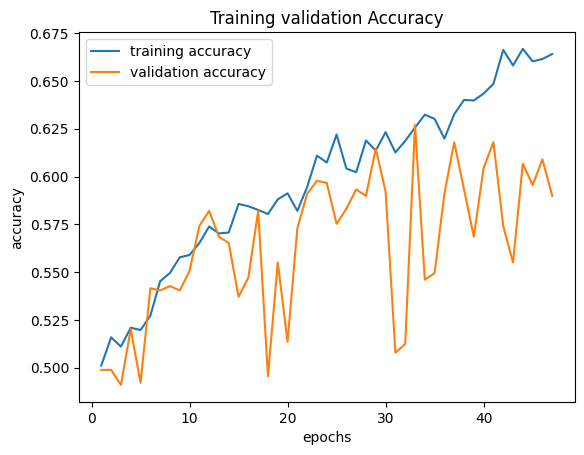

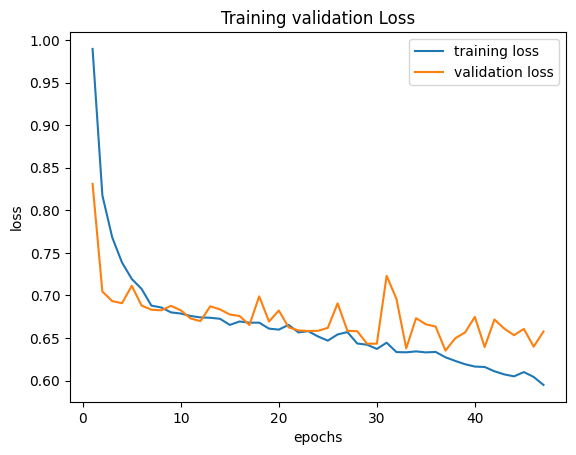

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training validation Accuracy')
plt.show()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training validation Loss')
plt.show()

In [ ]:
model.evaluate(test_data)

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.6417 - loss: 0.6153


[0.6579097509384155, 0.606942892074585]

In [ ]:
model.save('20_may_2_model.h5')

In [ ]:
# model = tf.keras.models.load_model('Trail_1_Main_20_may_model.h5')
model = tf.keras.models.load_model('20_may_2_model.h5')

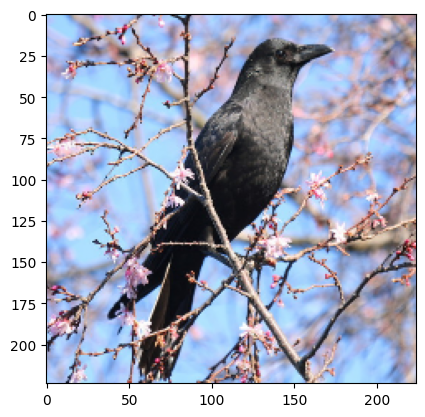

In [ ]:
import cv2
img = cv2.imread(r"/content/data/train/0/American_Crow_0002_25122.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img/255.0
plt.imshow(img)

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
input_img = img.reshape(1,224,224,3)
input_img.shape

(1, 224, 224, 3)

In [ ]:
output = model.predict(input_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
output

array([[0.60501224, 0.39498776]], dtype=float32)

In [ ]:
out = np.argmax(output)
out

0

In [ ]:
print(test_data.class_indices)

{'0': 0, '1': 1}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
result is = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
result is = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
result is = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
result is = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
result is = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
result is = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
result is = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
result is = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
result is = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
result is = 1
1/1 ━━━━━━━━

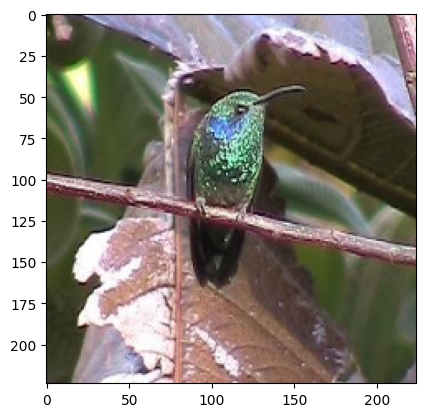

In [ ]:
count_3=0
count_4=0
count_5=0

for img_path in glob.glob(r"/content/data/val/*/*"):
#for img_path in glob.glob("/content/sample_data/test data/*"):


    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    img = img/255.0
    plt.imshow(img)
    input_img = img.reshape(1,224,224,3)
    output = model.predict(input_img)
    out = np.argmax(output)
    print('result is =',out)
    if out == 0:
        count_3+=1
    elif out == 1:
        count_4+=1
    else:
        count_5+=1



In [ ]:
print(count_3, count_4, count_5)

494 396 0


# 20241016
# Create CNN model to get better accuracy

In [ ]:
# To unzip
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Zero_Shot_Learning/Test_data/CUB_data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
# from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D, SeparableConv2D
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.preprocessing import image


In [ ]:
# Custom CNN with Attention
def custom_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape+[3])

    # Block 1: Convolutional block with Attention
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    # x = BatchNormalization()(x)
    # x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.3)(x)

    # Block 2: Advanced Convolutional Block (Separable Conv)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.4)(x)

    # Block 3: Deeper Conv Block with Global Pooling
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    # x = BatchNormalization()(x)

    # Global Average Pooling and Fully Connected Layers
    x = GlobalAveragePooling2D()(x)

    x = Flatten()(x)
    # x = Dense(256, activation='relu')(x)
    # x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    # x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.summary()

    return model

In [ ]:
train_data_path = os.path.join('data', 'train') # '/content/data/train'
valid_data_path = os.path.join('data', 'test') # '/content/data/test'

# train_data_agumentation = ImageDataGenerator(rescale = 1./255,
#                                              zoom_range = 0.1,
#                                              rotation_range = 10,
#                                              width_shift_range = 0.1,
#                                              height_shift_range = 0.1
#                                              )

train_data_agumentation = ImageDataGenerator(rescale=1./255,  # Normalize pixel values
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            rotation_range=20,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            validation_split=0.2  # 20% for validation
                                        )

val_data_agumentation = ImageDataGenerator(rescale = 1./255)

# load training data
train_data = train_data_agumentation.flow_from_directory(directory = train_data_path,
                                                         target_size = (224,224),
                                                         class_mode = 'categorical',
                                                         batch_size = 32)

val_data = val_data_agumentation.flow_from_directory(directory = valid_data_path,
                                                     target_size = (224,224),
                                                     class_mode = 'categorical',
                                                     batch_size = 32)

Found 4156 images belonging to 2 classes.
Found 893 images belonging to 2 classes.


In [ ]:
checkpoint_dir = 'checkpoints_CNN_models'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_filepath = os.path.join(checkpoint_dir,
                                   "model_epoch_{epoch:02d}_val_acc_{val_accuracy:.2f}_val_loss_{val_loss:.2f}.keras")

checkpoint = ModelCheckpoint(filepath = checkpoint_filepath,
                             monitor = 'val_loss',
                             verbose = 0,
                             save_best_only = True,
                             save_weights_only = False,
                             mode = 'auto')

early = EarlyStopping(monitor = 'val_loss',
                      min_delta = 0,
                      patience = 10,
                      verbose = 0,
                      mode = 'auto')

reduceLR = ReduceLROnPlateau(monitor = "val_loss",
                             factor = 0.1,
                             patience = 5,
                             verbose = 0,
                             mode = "auto",
                             min_delta = 0.00001,
                             cooldown = 0,
                             min_lr = 0.0)

csv_logger = CSVLogger(os.path.join(checkpoint_dir, 'training.log'))

callbacks_list = [checkpoint, csv_logger] #, early reduceLR,


In [ ]:
image_size = [224, 224]
num_classes = len(glob.glob(train_data_path+'/*'))

model = custom_cnn(image_size, num_classes)

# Step 5: Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Step 6: Train the model
history = model.fit(
    train_data,  # Training data
    epochs = 100,  # Number of epochs
    batch_size = 32,
    validation_data = val_data,  # Validation data
    callbacks = callbacks_list
)

# Save the trained model
save_model_path = os.path.join(checkpoint_dir, 'custom_cnn_model.h5')
model.save(save_model_path)
print(f"Model saved as {save_model_path}.")


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,018 (429.76 KB)

 Trainable params: 110,018 (429.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 72s 495ms/step - accuracy: 0.5051 - loss: 0.6936 - val_accuracy: 0.4994 - val_loss: 0.6930
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 61s 449ms/step - accuracy: 0.5071 - loss: 0.6932 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 63s 455ms/step - accuracy: 0.5168 - loss: 0.6931 - val_accuracy: 0.5196 - val_loss: 0.6928
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 81s 455ms/step - accuracy: 0.5177 - loss: 0.6928 - val_accuracy: 0.5106 - val_loss: 0.6929
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 61s 449ms/step - accuracy: 0.5295 - loss: 0.6924 - val_accuracy: 0.5342 - val_loss: 0.6902
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 82s 453ms/step - accuracy: 0.5257 - loss: 0.6915 - val_accuracy: 0.5498 - val_loss: 0.6900
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 81s 446ms/step - accuracy: 0.5339 - loss: 0.6914 - val_accuracy: 0.5162 - val_loss: 0.6906
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 60s 444ms/step - accuracy: 0.5395 - loss: 0.690

KeyboardInterrupt: 

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.savefig('CNN_model_accuracy_and_val_accuracy.png', dpi=200)
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('CNN_model_loss_and_val_loss.png', dpi=200)
plt.show()

# Test with Resnet50

In [ ]:
# To unzip
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Zero_Shot_Learning/Test_data/CUB_data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout,BatchNormalization,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2  # 20% for validation
)

train_generator = datagen.flow_from_directory(
    '/content/data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = datagen.flow_from_directory(
    '/content/data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 4156 images belonging to 2 classes.
Found 893 images belonging to 2 classes.


In [ ]:
base_model = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3))

for layer in base_model.layers[:140]:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(2, activation='softmax'))

checkpoint_dir = 'checkpoints_ResNet50_models'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_filepath = os.path.join(checkpoint_dir,
                                   "model_epoch_{epoch:02d}_val_acc_{val_accuracy:.2f}_val_loss_{val_loss:.2f}.keras")

check_point = ModelCheckpoint(filepath=checkpoint_filepath,
                              monitor="val_acc",
                              mode="max",
                              save_best_only=True,
                              )

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[check_point])

# Save the trained model
save_model_path = os.path.join(checkpoint_dir, 'ResNet50_model.h5')
model.save(save_model_path)
print(f"Model saved as {save_model_path}.")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 15/130 ━━━━━━━━━━━━━━━━━━━━ 20:36 11s/step - accuracy: 0.5106 - loss: 0.7256

KeyboardInterrupt: 

# Study link
1. https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/


# Test with VGG16

In [1]:
# To unzip
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Zero_Shot_Learning/Test_data/dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


# Split dataset to Train, Validate and Test

In [2]:
!pip install split-folders

import splitfolders
splitfolders.ratio(r"/content/dataset",
                   'data',
                   seed=1111,
                   ratio=(0.6, 0.25, 0.15)) # train/val/test

Copying files: 11796 files [00:05, 2174.98 files/s]


# Start to Training

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16, MobileNet, ResNet50, DenseNet121, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
# Function to create a model with a given base model
def create_transfer_learning_model(base_model, num_classes):
    base_model.trainable = False  # Freeze base model layers
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax' if num_classes > 1 else 'sigmoid')(x)
    model = Model(inputs, outputs)
    return model

# Function to train a specific model
def train_model(model, train_generator, val_generator, epochs=10, learning_rate=0.001):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy' if train_generator.num_classes > 1 else 'binary_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=epochs,
                        steps_per_epoch=100)
    return model, history

# Functions to create specific models
def create_vgg16_model(num_classes):
    return create_transfer_learning_model(VGG16(weights='imagenet', include_top=False), num_classes)

def create_mobilenet_model(num_classes):
    return create_transfer_learning_model(MobileNet(weights='imagenet', include_top=False), num_classes)

def create_resnet50_model(num_classes):
    return create_transfer_learning_model(ResNet50(weights='imagenet', include_top=False), num_classes)

def create_densenet_model(num_classes):
    return create_transfer_learning_model(DenseNet121(weights='imagenet', include_top=False), num_classes)

def create_inceptionv3_model(num_classes):
    return create_transfer_learning_model(InceptionV3(weights='imagenet', include_top=False), num_classes)

# Function to save the model
def save_model(model, filepath):
    model.save(filepath)
    print(f"Model saved to {filepath}")

# Function to load the model
def load_model(filepath):
    model = tf.keras.models.load_model(filepath)
    print(f"Model loaded from {filepath}")
    return model

# Function to evaluate the model
def evaluate_model(model, test_generator):
    predictions = model.predict(test_generator)

    predicted_classes = np.argmax(predictions, axis=1) if test_generator.num_classes > 1 else (predictions > 0.5).astype(int)

    # Handle binary and multiclass cases
    # if test_generator.num_classes > 1:  # Multiclass classification
    #     predicted_classes = np.argmax(predictions, axis=1)
    # else:  # Binary classification
    #     predicted_classes = (predictions > 0.5).astype(int).flatten()

    true_classes = test_generator.classes
    # class_indices = test_generator.class_indices

    # Metrics
    acc = accuracy_score(true_classes, predicted_classes)
    loss = 1 - acc
    cm = confusion_matrix(true_classes, predicted_classes)
    cr = classification_report(true_classes, predicted_classes)
    kappa = cohen_kappa_score(true_classes, predicted_classes)

    print(f"Accuracy: {acc}")
    print(f"Loss: {loss}")
    print(f"Cohen Kappa Score: {kappa}")
    print("Classification Report:")
    print(cr)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

    return acc, kappa, cm, cr

# Function to prepare data generators
def prepare_data_generators(train_dir, val_dir, test_dir, target_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(rescale=1.0/255)
    train_generator = datagen.flow_from_directory(train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical')
    val_generator = datagen.flow_from_directory(val_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical')
    test_generator = datagen.flow_from_directory(test_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False)
    return train_generator, val_generator, test_generator


Found 7077 images belonging to 2 classes.
Found 2949 images belonging to 2 classes.
Found 1770 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 392ms/step - accuracy: 0.6646 - loss: 0.6104 - val_accuracy: 0.6789 - val_loss: 0.5804
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.7239 - loss: 0.5382 - val_accuracy: 0.7094 - val_loss: 0.5393
Epoch 3/10
 22/100 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.7017 - loss: 0.5243 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.7228 - loss: 0.5206 - val_accuracy: 0.6728 - val_loss: 0.6209
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 313ms/step - accuracy: 0.6971 - loss: 0.5455 - val_accuracy: 0.7138 - val_loss: 0.5321
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.7431 - loss: 0.5136 - val_accuracy: 0.7175 - val_loss: 0.5240
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.7476 - loss: 0.4977 - val_accuracy: 0.7111 - val_loss: 0.5235
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 308ms/step - accuracy: 0.7353 - loss: 0.4990 - val_accuracy: 0.7162 - val_loss: 0.5551
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.7486 - loss: 0.4845 - val_accuracy: 0.7270 - val_loss: 0.5104
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.7243 - loss: 0.5066 - val_accuracy: 0.7152 - val_loss: 0.5358
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 313ms/step - accuracy: 0.7650 - loss: 0.4661 - va

Model saved to vgg16_model.h5
Model loaded from vgg16_model.h5
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 259ms/step
Accuracy: 0.748587570621469
Loss: 0.25141242937853103
Cohen Kappa Score: 0.40510447774721414
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1152
           1       0.70      0.49      0.58       618

    accuracy                           0.75      1770
   macro avg       0.73      0.69      0.70      1770
weighted avg       0.74      0.75      0.74      1770



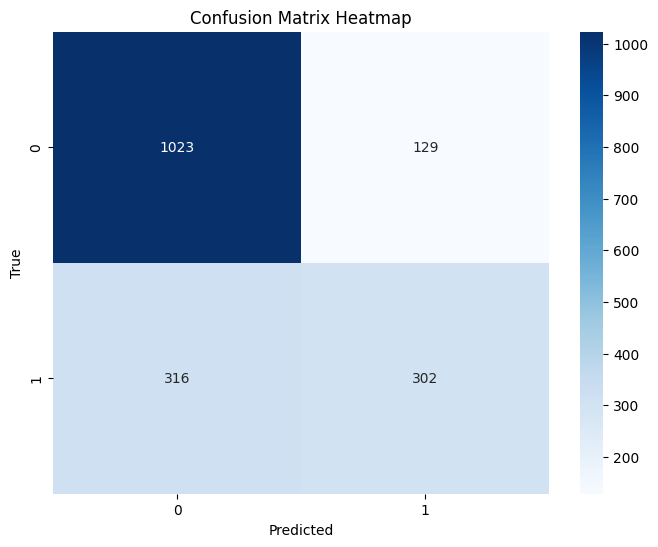

In [5]:
if __name__ == "__main__":
    # Paths to your data directories
    train_dir = "/content/data/train"
    val_dir = "/content/data/val"
    test_dir = "/content/data/test"

    # Prepare data
    train_gen, val_gen, test_gen = prepare_data_generators(train_dir, val_dir, test_dir)

    # Choose number of classes
    num_classes = train_gen.num_classes

    # Train VGG16 model
    vgg16_model = create_vgg16_model(num_classes)
    trained_vgg16, _ = train_model(vgg16_model, train_gen, val_gen, epochs=10)
    save_model(trained_vgg16, "vgg16_model.h5")
    # save_model(trained_vgg16, "vgg16_model.keras")

    # Load and evaluate VGG16 model
    loaded_vgg16 = load_model("vgg16_model.h5")
    evaluate_model(loaded_vgg16, test_gen)

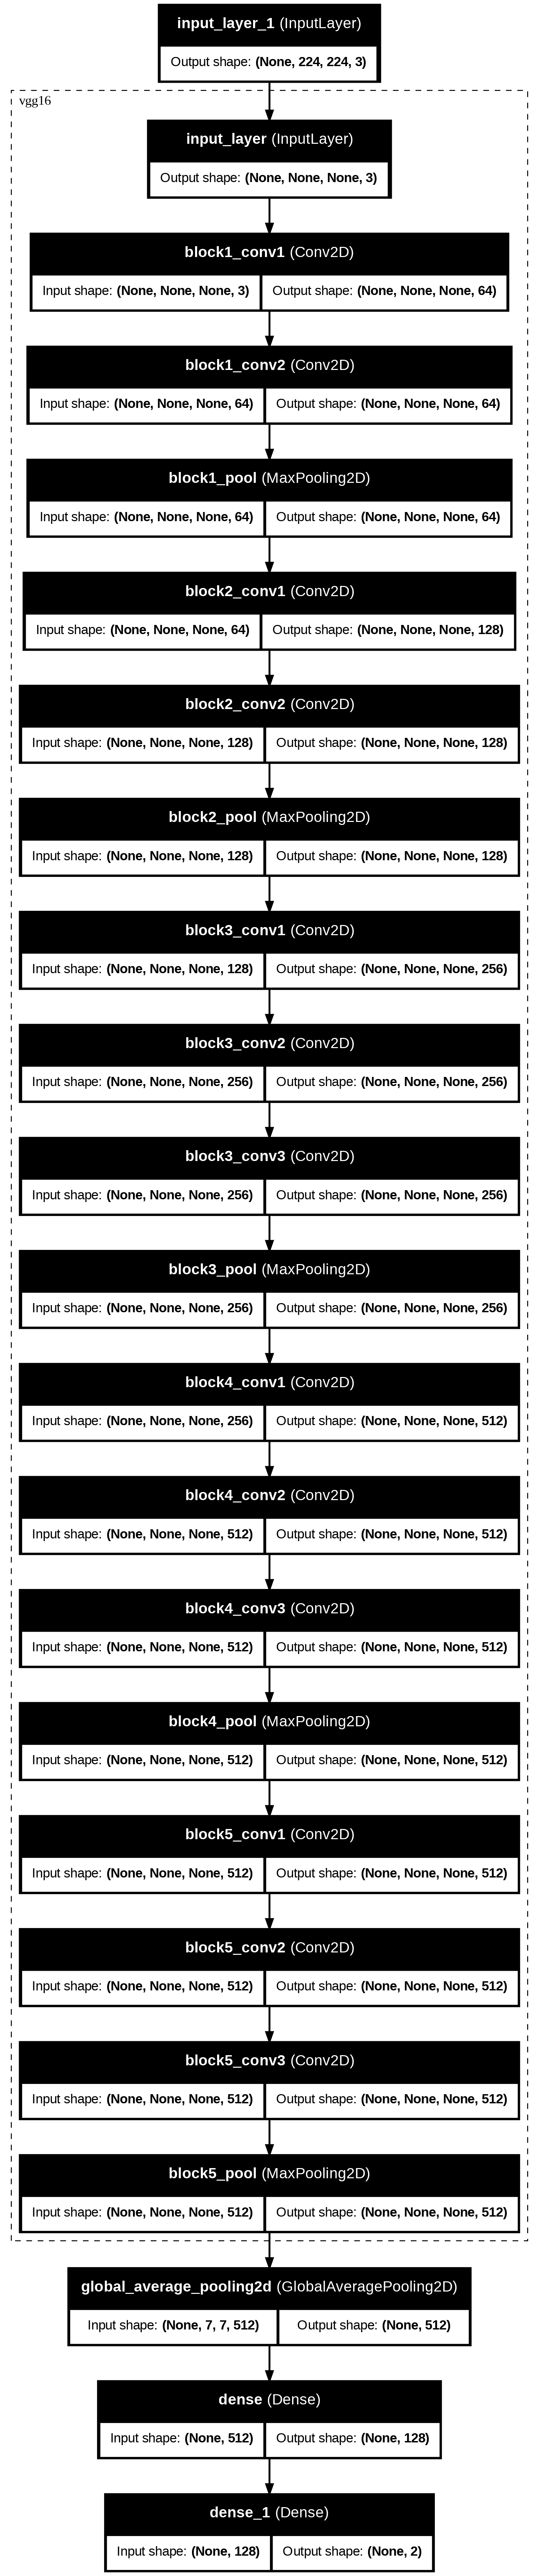

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(loaded_vgg16,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

Found 7077 images belonging to 2 classes.
Found 2949 images belonging to 2 classes.
Found 1770 images belonging to 2 classes.


<ipython-input-4-7252953c1e42>:30: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  return create_transfer_learning_model(MobileNet(weights='imagenet', include_top=False), num_classes)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 302ms/step - accuracy: 0.7508 - loss: 0.5598 - val_accuracy: 0.7721 - val_loss: 0.4421
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 355ms/step - accuracy: 0.7923 - loss: 0.4189 - val_accuracy: 0.7742 - val_loss: 0.4534
Epoch 3/10
 21/100 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.7641 - loss: 0.4896

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.7810 - loss: 0.4483 - val_accuracy: 0.7742 - val_loss: 0.4346
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 252ms/step - accuracy: 0.7999 - loss: 0.4060 - val_accuracy: 0.7748 - val_loss: 0.4470
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 343ms/step - accuracy: 0.8115 - loss: 0.3980 - val_accuracy: 0.7813 - val_loss: 0.4209
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.8310 - loss: 0.3658 - val_accuracy: 0.7874 - val_loss: 0.4122
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 341ms/step - accuracy: 0.8325 - loss: 0.3492 - val_accuracy: 0.7806 - val_loss: 0.4232
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - accuracy: 0.8362 - loss: 0.3484 - val_accuracy: 0.7881 - val_loss: 0.4138
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.8256 - loss: 0.3542 - val_accuracy: 0.7626 - val_loss: 0.4995
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 340ms/step - accuracy: 0.8453 - loss: 0.3319 - va

Model saved to mobilenet_model.h5


Model loaded from mobilenet_model.h5
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step
Accuracy: 0.7971751412429379
Loss: 0.20282485875706213
Cohen Kappa Score: 0.5261881646586166
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1152
           1       0.78      0.58      0.67       618

    accuracy                           0.80      1770
   macro avg       0.79      0.75      0.76      1770
weighted avg       0.80      0.80      0.79      1770



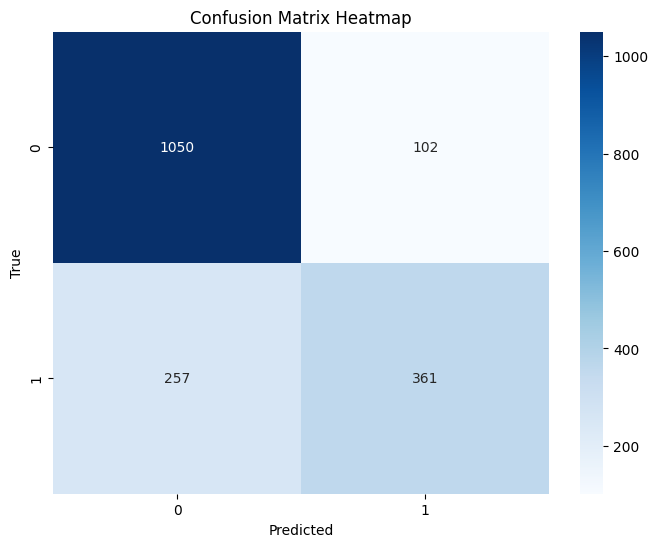

In [7]:
if __name__ == "__main__":
    # Paths to your data directories
    train_dir = "/content/data/train"
    val_dir = "/content/data/val"
    test_dir = "/content/data/test"

    # Prepare data
    train_gen, val_gen, test_gen = prepare_data_generators(train_dir, val_dir, test_dir)

    # Choose number of classes
    num_classes = train_gen.num_classes

    # Train VGG16 model
    mobilenet_model = create_mobilenet_model(num_classes)
    trained_mobilenet, _ = train_model(mobilenet_model, train_gen, val_gen, epochs=10)
    save_model(trained_mobilenet, "mobilenet_model.h5")

    # Load and evaluate VGG16 model
    loaded_mobilenet = load_model("mobilenet_model.h5")
    evaluate_model(loaded_mobilenet, test_gen)

Found 7077 images belonging to 2 classes.
Found 2949 images belonging to 2 classes.
Found 1770 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 357ms/step - accuracy: 0.5795 - loss: 0.7124 - val_accuracy: 0.6056 - val_loss: 0.6805
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.6434 - loss: 0.6469 - val_accuracy: 0.6511 - val_loss: 0.6443
Epoch 3/10
 22/100 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.6778 - loss: 0.6017

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.6565 - loss: 0.6155 - val_accuracy: 0.6548 - val_loss: 0.6250
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 290ms/step - accuracy: 0.6526 - loss: 0.6323 - val_accuracy: 0.6524 - val_loss: 0.6259
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.6479 - loss: 0.6353 - val_accuracy: 0.6714 - val_loss: 0.6262
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.6543 - loss: 0.6197 - val_accuracy: 0.6575 - val_loss: 0.6154
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 278ms/step - accuracy: 0.6522 - loss: 0.6255 - val_accuracy: 0.6534 - val_loss: 0.6213
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 335ms/step - accuracy: 0.6732 - loss: 0.6061 - val_accuracy: 0.6612 - val_loss: 0.6219
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.6368 - loss: 0.6225 - val_accuracy: 0.6646 - val_loss: 0.6095
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 354ms/step - accuracy: 0.6601 - loss: 0.6279 - va

Model saved to resnet50_model.h5


Model loaded from resnet50_model.h5
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 211ms/step
Accuracy: 0.6146892655367232
Loss: 0.3853107344632768
Cohen Kappa Score: 0.24708849769474872
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.56      0.65      1152
           1       0.47      0.72      0.57       618

    accuracy                           0.61      1770
   macro avg       0.63      0.64      0.61      1770
weighted avg       0.68      0.61      0.62      1770



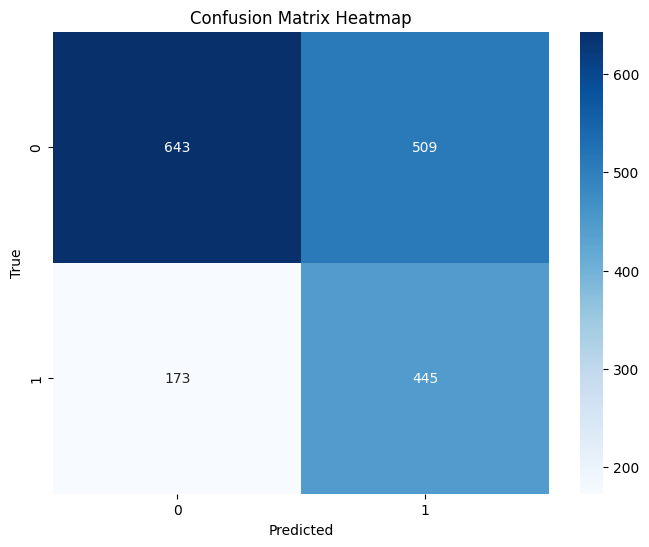

In [8]:
if __name__ == "__main__":
    # Paths to your data directories
    train_dir = "/content/data/train"
    val_dir = "/content/data/val"
    test_dir = "/content/data/test"

    # Prepare data
    train_gen, val_gen, test_gen = prepare_data_generators(train_dir, val_dir, test_dir)

    # Choose number of classes
    num_classes = train_gen.num_classes

    # Train VGG16 model
    resnet50_model = create_resnet50_model(num_classes)
    trained_resnet50, _ = train_model(resnet50_model, train_gen, val_gen, epochs=10)
    save_model(trained_resnet50, "resnet50_model.h5")

    # Load and evaluate VGG16 model
    loaded_resnet50 = load_model("resnet50_model.h5")
    evaluate_model(loaded_resnet50, test_gen)

Found 7077 images belonging to 2 classes.
Found 2949 images belonging to 2 classes.
Found 1770 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 585ms/step - accuracy: 0.7223 - loss: 0.5944 - val_accuracy: 0.7589 - val_loss: 0.4782
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - accuracy: 0.7749 - loss: 0.4324 - val_accuracy: 0.7850 - val_loss: 0.4308
Epoch 3/10
 22/100 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.8055 - loss: 0.4420

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.8010 - loss: 0.4278 - val_accuracy: 0.7942 - val_loss: 0.4119
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 283ms/step - accuracy: 0.8181 - loss: 0.3765 - val_accuracy: 0.7976 - val_loss: 0.4122
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 286ms/step - accuracy: 0.8063 - loss: 0.3916 - val_accuracy: 0.7508 - val_loss: 0.4877
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.8027 - loss: 0.3987 - val_accuracy: 0.7809 - val_loss: 0.4354
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 276ms/step - accuracy: 0.8186 - loss: 0.3739 - val_accuracy: 0.7674 - val_loss: 0.4412
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - accuracy: 0.8117 - loss: 0.3799 - val_accuracy: 0.8043 - val_loss: 0.3947
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.8447 - loss: 0.3561 - val_accuracy: 0.8030 - val_loss: 0.3911
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 283ms/step - accuracy: 0.8349 - loss: 0.3540 - va

Model saved to densenet_model.h5


Model loaded from densenet_model.h5
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 341ms/step
Accuracy: 0.7751412429378531
Loss: 0.22485875706214686
Cohen Kappa Score: 0.5448519150255854
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1152
           1       0.63      0.87      0.73       618

    accuracy                           0.78      1770
   macro avg       0.77      0.80      0.77      1770
weighted avg       0.81      0.78      0.78      1770



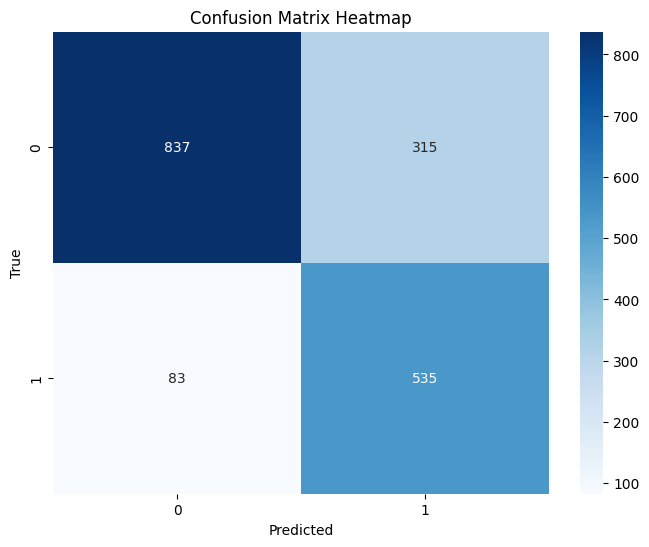

In [9]:
if __name__ == "__main__":
    # Paths to your data directories
    train_dir = "/content/data/train"
    val_dir = "/content/data/val"
    test_dir = "/content/data/test"

    # Prepare data
    train_gen, val_gen, test_gen = prepare_data_generators(train_dir, val_dir, test_dir)

    # Choose number of classes
    num_classes = train_gen.num_classes

    # Train VGG16 model
    densenet_model = create_densenet_model(num_classes)
    trained_densenet, _ = train_model(densenet_model, train_gen, val_gen, epochs=10)
    save_model(trained_densenet, "densenet_model.h5")

    # Load and evaluate VGG16 model
    loaded_densenet = load_model("densenet_model.h5")
    evaluate_model(loaded_densenet, test_gen)

Found 7077 images belonging to 2 classes.
Found 2949 images belonging to 2 classes.
Found 1770 images belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 437ms/step - accuracy: 0.7218 - loss: 0.6501 - val_accuracy: 0.7887 - val_loss: 0.4222
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 349ms/step - accuracy: 0.8003 - loss: 0.3982 - val_accuracy: 0.7921 - val_loss: 0.4115
Epoch 3/10
 22/100 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.8025 - loss: 0.3899

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.8059 - loss: 0.3851 - val_accuracy: 0.7932 - val_loss: 0.4065
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 271ms/step - accuracy: 0.8109 - loss: 0.3794 - val_accuracy: 0.7847 - val_loss: 0.4126
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - accuracy: 0.8366 - loss: 0.3483 - val_accuracy: 0.7816 - val_loss: 0.4130
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.8138 - loss: 0.3925 - val_accuracy: 0.7979 - val_loss: 0.4082
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.8090 - loss: 0.3834 - val_accuracy: 0.7979 - val_loss: 0.4016
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 275ms/step - accuracy: 0.8205 - loss: 0.3542 - val_accuracy: 0.8013 - val_loss: 0.3911
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.8260 - loss: 0.3698 - val_accuracy: 0.7945 - val_loss: 0.3965
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 275ms/step - accuracy: 0.8308 - loss: 0.3398 - va

Model saved to inceptionv3_model.h5


Model loaded from inceptionv3_model.h5
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step
Accuracy: 0.8028248587570621
Loss: 0.1971751412429379
Cohen Kappa Score: 0.5807833412734283
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1152
           1       0.69      0.79      0.74       618

    accuracy                           0.80      1770
   macro avg       0.78      0.80      0.79      1770
weighted avg       0.81      0.80      0.81      1770



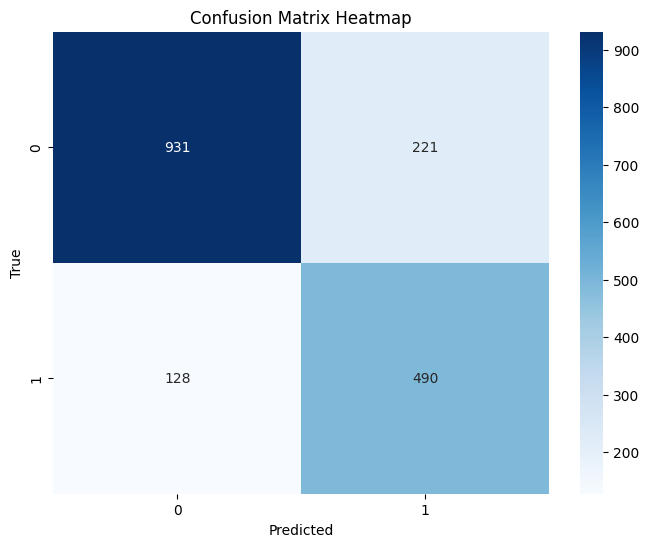

In [10]:
if __name__ == "__main__":
    # Paths to your data directories
    train_dir = "/content/data/train"
    val_dir = "/content/data/val"
    test_dir = "/content/data/test"

    # Prepare data
    train_gen, val_gen, test_gen = prepare_data_generators(train_dir, val_dir, test_dir)

    # Choose number of classes
    num_classes = train_gen.num_classes

    # Train VGG16 model
    inceptionv3_model = create_inceptionv3_model(num_classes)
    trained_inceptionv3, _ = train_model(inceptionv3_model, train_gen, val_gen, epochs=10)
    save_model(trained_inceptionv3, "inceptionv3_model.h5")

    # Load and evaluate VGG16 model
    loaded_inceptionv3 = load_model("inceptionv3_model.h5")
    evaluate_model(loaded_inceptionv3, test_gen)